# Using the Nutrition Facts for McDonald's Menu Dataset sourced from Kaggle

## Objective : 
Using the Pandas library, load a CSV file and perform basic data analysis tasks, such as 
calculating the average of a selected column. Additionally, use Matplotlib to create 
visualizations, including bar charts, scatter plots, and heatmaps, to analyze the data. Provide 
insights and observations based on the analysis and visualizations. 

## ➡️Loading csv 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

## ➡️Calculating Mean / Average of a Selected Column 

In [4]:
mean_calories = df['Calories'].mean()
print("Mean of column is ",mean_calories)

Mean of column is  368.2692307692308


## ➡️Using Matplotlib

### Bar chart 

In [5]:
category_avg = df.groupby('Category')['Calories'].mean()

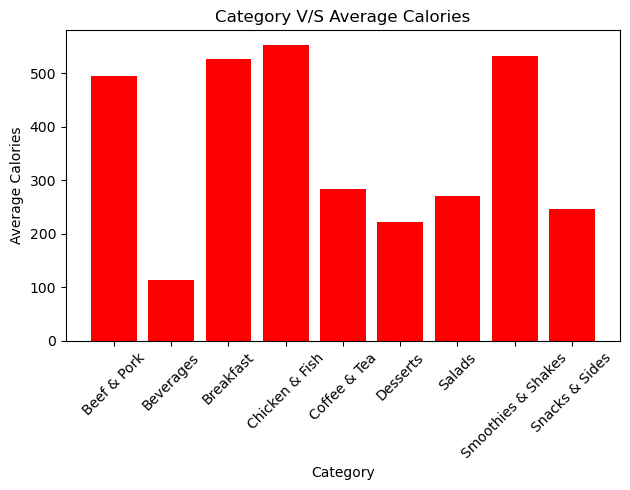

In [6]:
plt.bar(category_avg.index, category_avg.values, color='red')
plt.xlabel('Category')
plt.ylabel('Average Calories')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.title('Category V/S Average Calories')
plt.show()

#### 🔴 Observations: 
Chicken & Fish items have very high calories >500. closely followed by Breakfast.
Beverages have the lowest average calories.
The seemingly healthy option, Salads also seem to have >200 calories , likely due to sides offered.

### Scatter Plots 

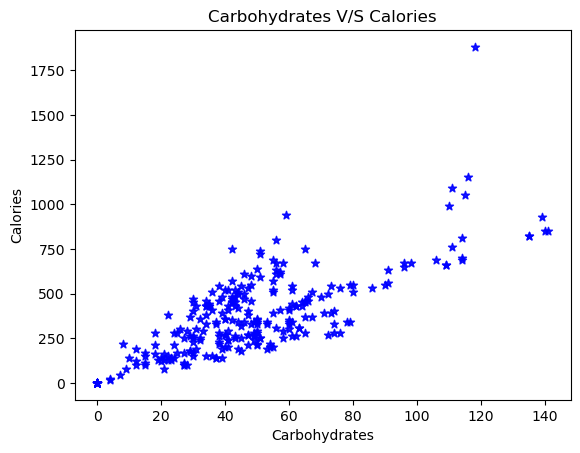

In [12]:
plt.scatter(df['Carbohydrates'], df['Calories'], color='blue', alpha=0.9,marker='*')
plt.xlabel('Carbohydrates') 
plt.ylabel('Calories')
plt.title('Carbohydrates V/S Calories')
plt.show() 

#### 🔴 Observations: 
There is an obvious association indicating higher the carbohydrates, higher the calories. There is a large cluster in the range of 20-60g of cabbohydrates having calries between 200-750.
the outliers at 120g with more than 1750 calories may most likely be extremely sugary dishes.

### Heatmap

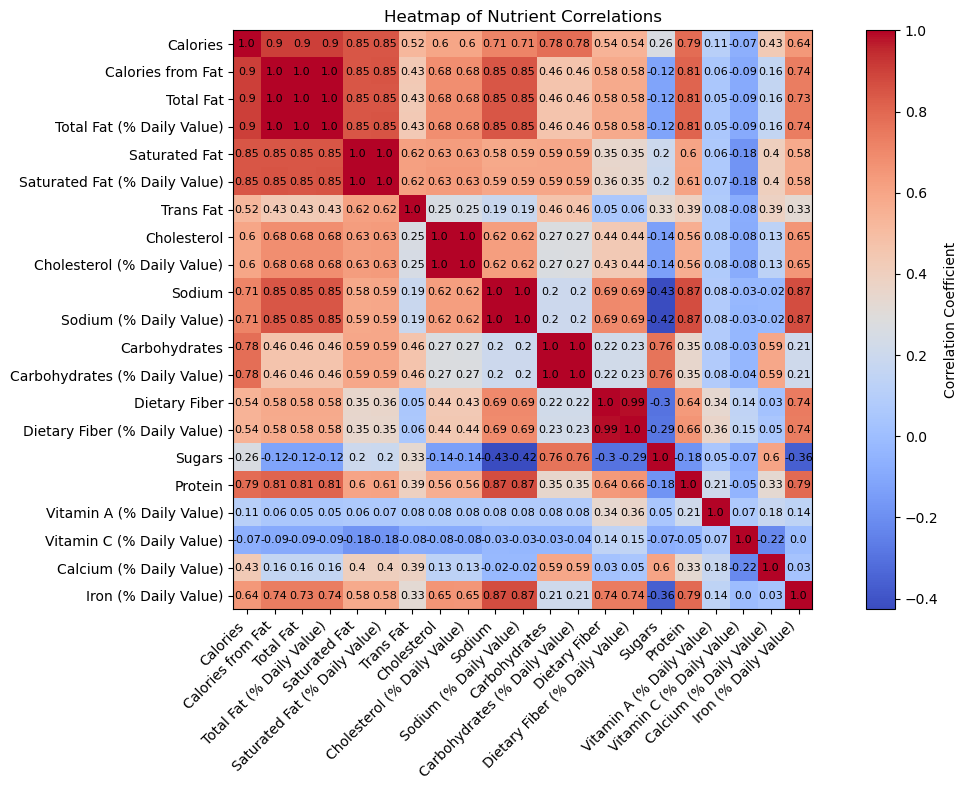

In [8]:
correlation = df.select_dtypes(include='number').corr()


plt.figure(figsize=(12,8)) 
plt.imshow(correlation, cmap='coolwarm', interpolation='nearest') 
plt.colorbar(label='Correlation Coefficient')  


labels = correlation.columns
plt.xticks(range(len(labels)), labels, rotation=45, ha='right') 
plt.yticks(range(len(labels)), labels)


for i in range(len(labels)):
    for j in range(len(labels)):
        value = round(correlation.iloc[i, j], 2)
        plt.text(j, i, str(value), ha='center', va='center', color='black', fontsize=8)

plt.title('Heatmap of Nutrient Correlations')  
plt.tight_layout()  
plt.show()


#### 🔴 Observations: 
Calories are closely associated with calories from fat and total fat with a correlation coefficient of almost 0.9.
Vitamin C has a negative correlation with calories , this indicates that it has no effect on calories.